In [1]:
import pandas as pd
import TECHNIC as QT
from TECHNIC import TSFM, DF, GR

## Internal Data Loader

In [2]:
df_internal_raw = pd.read_excel('fake_internal.xlsx')
df_internal_raw.head()

,Date,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price
0,2018-01-31,1525.766256,0.054260,808.925168,0.018648,1022.483571,0.045600
1,2018-02-28,1540.515474,0.046348,835.771506,0.034777,1041.792249,0.023520
2,2018-03-31,1566.467979,0.026517,863.370334,0.017302,1065.030692,0.025023
3,2018-04-30,1563.129764,0.022823,896.188563,0.036981,1092.645841,0.013759
4,2018-05-31,1583.883081,0.045697,908.819056,0.032661,1111.475074,0.033131


In [3]:
ID_config = {
    'df': df_internal_raw,
    'start': '2018-01-15',
    'end': '2023-11-15',
    'freq': 'M'
}
IDLoader = QT.InternalDataLoader(**ID_config)
IDLoader.load()

In [4]:
IDLoader.internal_data.tail()

,Date,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price,Q1,Q2,Q3,...,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
2023-07-31,2023-07-31,2489.052561,0.033147,2518.590119,0.053016,2289.250500,0.035404,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2023-08-31,2023-08-31,2509.747182,0.046901,2582.117434,0.050611,2314.268164,0.011812,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2023-09-30,2023-09-30,2516.131131,0.050095,2612.826339,0.033226,2336.076344,0.024985,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2023-10-31,2023-10-31,2532.723351,0.051663,2649.181996,0.039805,2352.850746,0.035034,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2023-11-30,2023-11-30,2556.873350,0.051585,2683.722013,0.026095,2374.657724,0.030125,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Mev Loader

In [4]:
MEV_config = {
    'model_mev_source': {'fake_scens.xlsx': 'base'},
    'scen_mevs_source': {
        'fake_scens.xlsx': {'base':'base', 'adv':'adv', 'sev':'sev'}
    } 
}
MEVLoader = QT.MEVLoader(**MEV_config)
MEVLoader.load()

In [5]:
MEVLoader.model_mev

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.16,10032.57,8047.46,3.64,3.08
2000-06-30,99.74,9996.18,8044.02,4.42,3.96
2000-09-30,99.77,9940.38,8035.14,4.82,9.3
2000-12-31,99.54,10063.83,7958.35,6.23,9.12
2001-03-31,99.8,9925.75,8018.19,5.85,7.18
...,...,...,...,...,...
2029-12-31,105.11,10440.04,8241.36,6.99,5.95
2030-03-31,104.82,10487.64,8309.24,3.75,8.16
2030-06-30,104.71,10610.59,8355.29,4.15,4.67
2030-09-30,104.76,10546.66,8319.09,6.61,3.77


In [6]:
MEVLoader.scen_mevs['fake_scens']['base']

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.16,10032.57,8047.46,3.64,3.08
2000-06-30,99.74,9996.18,8044.02,4.42,3.96
2000-09-30,99.77,9940.38,8035.14,4.82,9.3
2000-12-31,99.54,10063.83,7958.35,6.23,9.12
2001-03-31,99.8,9925.75,8018.19,5.85,7.18
...,...,...,...,...,...
2029-12-31,105.11,10440.04,8241.36,6.99,5.95
2030-03-31,104.82,10487.64,8309.24,3.75,8.16
2030-06-30,104.71,10610.59,8355.29,4.15,4.67
2030-09-30,104.76,10546.66,8319.09,6.61,3.77


In [7]:
MEVLoader.model_map

{'PSR': 'Personal Savings Rate (%)',
 'PDI': 'Personal Disposable Income (Billions)',
 'UNRATE': 'Unemployment Rate (%)',
 'CPI': 'Consumer Price Index'}

## Data Manager

In [8]:
dm_config = {
    'internal_loader': IDLoader,
    'mev_loader': MEVLoader,
    'in_sample_end': '2023-06-01'
}
dm = QT.DataManager(**dm_config)

In [9]:
dm.internal_in

,Date,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price,Q1,Q2,Q3,...,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
2018-01-31,2018-01-31,1525.766256,0.054260,808.925168,0.018648,1022.483571,0.045600,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-02-28,2018-02-28,1540.515474,0.046348,835.771506,0.034777,1041.792249,0.023520,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-03-31,2018-03-31,1566.467979,0.026517,863.370334,0.017302,1065.030692,0.025023,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2018-04-30,2018-04-30,1563.129764,0.022823,896.188563,0.036981,1092.645841,0.013759,False,True,False,...,False,True,False,False,False,False,False,False,False,False
2018-05-31,2018-05-31,1583.883081,0.045697,908.819056,0.032661,1111.475074,0.033131,False,True,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,2023-01-31,2406.497172,0.058002,2365.768354,0.033182,2171.207724,0.029665,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-02-28,2023-02-28,2414.061046,0.058024,2401.306374,0.040102,2190.279429,0.028939,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-03-31,2023-03-31,2432.376193,0.042938,2412.529681,0.038373,2204.747754,0.016928,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2023-04-30,2023-04-30,2440.940224,0.045273,2428.151430,0.051046,2218.766721,0.027354,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [10]:
dm.model_mev

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.160000,10032.570000,8047.460000,3.640000,3.080000
2000-04-30,99.896506,10049.097386,8036.334431,4.098958,2.067059
2000-05-31,99.768751,10031.340067,8037.305959,4.332339,2.532845
2000-06-30,99.740000,9996.180000,8044.020000,4.420000,3.960000
2000-07-31,99.761353,9957.712737,8050.351074,4.466939,5.934583
...,...,...,...,...,...
2030-08-31,104.723199,10583.356792,8335.923233,5.871737,3.600410
2030-09-30,104.760000,10546.660000,8319.090000,6.610000,3.770000
2030-10-31,104.821508,10508.335975,8302.079944,7.095223,4.235333
2030-11-30,104.905647,10482.105303,8289.926172,7.143834,4.837014


In [11]:
# Build Search Vars
var_lst = ['VR_price', 'NGDP', 'PDI']
df_dict = dm.build_search_vars(var_lst)
df_dict


/Users/kexinz8/Desktop/LEGO/Project_LEGO/TECHNIC/data.py:265: UserWarning: No type mapping found for variables: VR_price. Building raw variables only for those.
  warnings.warn(


{'VR_price':             VR_price
 2018-01-31  0.045600
 2018-02-28  0.023520
 2018-03-31  0.025023
 2018-04-30  0.013759
 2018-05-31  0.033131
 ...              ...
 2023-07-31  0.035404
 2023-08-31  0.011812
 2023-09-30  0.024985
 2023-10-31  0.035034
 2023-11-30  0.030125
 
 [71 rows x 1 columns],
 'NGDP':                NGDP_LV   NGDP_GR
 2000-03-31  100.160000       NaN
 2000-04-30   99.896506 -0.002631
 2000-05-31   99.768751 -0.001279
 2000-06-30   99.740000 -0.000288
 2000-07-31   99.761353  0.000214
 ...                ...       ...
 2030-08-31  104.723199  0.000158
 2030-09-30  104.760000  0.000351
 2030-10-31  104.821508  0.000587
 2030-11-30  104.905647  0.000803
 2030-12-31  105.020000  0.001090
 
 [370 rows x 2 columns],
 'PDI':                  PDI_LV    PDI_GR     PDI_DF
 2000-03-31  8047.460000       NaN        NaN
 2000-04-30  8036.334431 -0.001382 -11.125569
 2000-05-31  8037.305959  0.000121   0.971528
 2000-06-30  8044.020000  0.000835   6.714041
 2000-07-31  8050.

In [12]:
# Apply to MEVs
def new_features(df_mev, df_in):
    df_mev['NGDP-Price'] =  df_mev['NGDP'] - df_in['VR_price']
    df_mev['PDI-FixBal'] =  df_mev['PDI'] - df_in['Fixed_balance']

    return df_mev

dm.apply_to_mevs(new_features)

In [13]:
dm.model_mev.dropna()

nan,NGDP,PSR,PDI,UNRATE,CPI,NGDP-Price,PDI-FixBal
2018-01-31,103.025249,10252.993643,8174.638090,4.552795,4.264135,102.979649,6648.871834
2018-02-28,103.046777,10283.227034,8181.637653,5.961332,5.269250,103.023257,6641.122180
2018-03-31,103.050000,10317.070000,8191.440000,6.980000,6.980000,103.024977,6624.972021
2018-04-30,103.012962,10338.592901,8202.088796,6.546695,8.690724,102.999203,6638.959033
2018-05-31,102.952276,10345.066305,8208.387253,5.216383,9.773928,102.919145,6624.504172
...,...,...,...,...,...,...,...
2023-07-31,103.796679,10317.677642,8256.675701,7.512735,3.334155,103.761276,5767.623140
2023-08-31,103.900526,10301.156371,8224.351573,7.035848,4.198376,103.888714,5714.604392
2023-09-30,103.870000,10320.710000,8199.060000,6.120000,5.210000,103.845015,5682.928869
2023-10-31,103.646070,10386.819893,8192.848776,4.810268,5.843201,103.611035,5660.125425


In [14]:
dm.scen_mevs['fake_scens']['sev'].dropna()

nan,NGDP,PSR,PDI,UNRATE,CPI,NGDP-Price,PDI-FixBal
2018-01-31,123.628335,9227.690845,9809.573241,4.096801,5.122003,123.582735,8283.806985
2018-02-28,123.655034,9254.901513,9817.971255,5.363644,6.322449,123.631515,8277.455781
2018-03-31,123.660000,9285.360000,9829.730000,6.280000,8.370000,123.634977,8263.262021
2018-04-30,123.616117,9304.728982,9842.503131,5.890569,10.421839,123.602358,8279.373368
2018-05-31,123.543272,9310.552874,9850.056366,4.694500,11.723791,123.510140,8266.173285
...,...,...,...,...,...,...,...
2023-07-31,124.564109,9285.917379,9908.013791,6.763720,3.997851,124.528705,7418.961230
2023-08-31,124.688705,9271.045085,9869.221516,6.333844,5.035452,124.676893,7359.474335
2023-09-30,124.650000,9288.640000,9838.870000,5.510000,6.250000,124.625015,7322.738869
2023-10-31,124.377333,9348.136944,9831.417643,4.333366,7.009335,124.342298,7298.694292


In [15]:
# Apply to Internal
print(dm.internal_data.head(3))
def new_features(df_in):
    df_in['VR_Bal-Price'] =  df_in['VR_balance'] - df_in['VR_price']
    df_in['Fixed_Bal-Price'] =  df_in['Fixed_balance'] - df_in['Fixed_price']

    return df_in

dm.apply_to_internal(new_features)
print(dm.internal_data.head(3))


                 Date  Fixed_balance  Fixed_price  Redeemable_balance  \
2018-01-31 2018-01-31    1525.766256     0.054260          808.925168   
2018-02-28 2018-02-28    1540.515474     0.046348          835.771506   
2018-03-31 2018-03-31    1566.467979     0.026517          863.370334   

            Redeemable_price   VR_balance  VR_price    Q1     Q2     Q3  ...  \
2018-01-31          0.018648  1022.483571  0.045600  True  False  False  ...   
2018-02-28          0.034777  1041.792249  0.023520  True  False  False  ...   
2018-03-31          0.017302  1065.030692  0.025023  True  False  False  ...   

               M3     M4     M5     M6     M7     M8     M9    M10    M11  \
2018-01-31  False  False  False  False  False  False  False  False  False   
2018-02-28  False  False  False  False  False  False  False  False  False   
2018-03-31   True  False  False  False  False  False  False  False  False   

              M12  
2018-01-31  False  
2018-02-28  False  
2018-03-31  False

In [16]:
print(dm.internal_data.head(3))

                 Date  Fixed_balance  Fixed_price  Redeemable_balance  \
2018-01-31 2018-01-31    1525.766256     0.054260          808.925168   
2018-02-28 2018-02-28    1540.515474     0.046348          835.771506   
2018-03-31 2018-03-31    1566.467979     0.026517          863.370334   

            Redeemable_price   VR_balance  VR_price    Q1     Q2     Q3  ...  \
2018-01-31          0.018648  1022.483571  0.045600  True  False  False  ...   
2018-02-28          0.034777  1041.792249  0.023520  True  False  False  ...   
2018-03-31          0.017302  1065.030692  0.025023  True  False  False  ...   

               M5     M6     M7     M8     M9    M10    M11    M12  \
2018-01-31  False  False  False  False  False  False  False  False   
2018-02-28  False  False  False  False  False  False  False  False   
2018-03-31  False  False  False  False  False  False  False  False   

            VR_Bal-Price  Fixed_Bal-Price  
2018-01-31   1022.437971      1525.711996  
2018-02-28   1041

## Model Building

### CM

In [18]:
cm_config = {
    'model_id': 'cm1',
    'target': 'VR_balance',
    'data_manager': dm,
    'model_cls': QT.OLS
}
cm1 = QT.CM(**cm_config)

In [19]:
mth_var = [f'M{i}' for i in range(2,5)]
indep_vars = [mth_var, 'NGDP']
cm1.build(indep_vars)

=== In-Sample Performance ===
       r2    adj_r2          me         mae        rmse
 0.705074  0.685413  515.865766  143.701378  190.572818

=== Out-of-Sample Performance ===
         me         mae        rmse
 762.857989  383.648044  430.941118

=== Model Parameters ===
Variable        Coef Pvalue       VIF       Std
   const -1.0538e+05  0.000 131997.74 8938.5811
      M2    222.5467  0.014      1.08   88.3770
      M3    328.1969  0.001      1.13   90.3893
      M4    278.6532  0.003      1.09   88.7724
    NGDP   1034.7491  0.000      1.19   86.4290


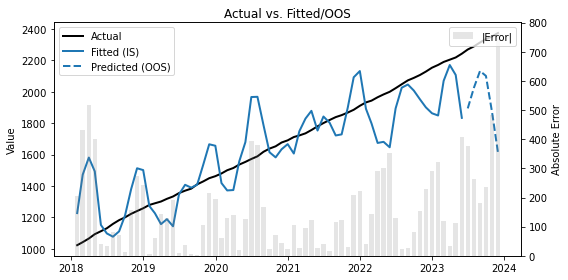


=== Model Testing ===
                              statistic    pvalue  passed
Category         Test                                    
NormalityTest    Jarque_Bera   2.841708  0.241508    True
                 Shapiro       0.964978  0.062586    True
StationarityTest ADF           0.120809  0.967453   False


In [20]:
cm1.show_report(show_tests=True)

In [21]:
print(cm1)

VR_balance~C+M2+M3+M4+NGDP


In [22]:
cm_config = {
    'model_id': 'cm1',
    'target': 'VR_balance',
    'model_cls': QT.OLS
}
cm2 = QT.CM(**cm_config)

mth_var = [f'M{i}' for i in range(2,12)]
indep_vars = [mth_var, 'NGDP']
cm2.build(indep_vars, data_manager=dm)

=== In-Sample Performance ===
       r2    adj_r2          me         mae        rmse
 0.729192  0.672986  514.473474  143.819729  182.614645

=== Out-of-Sample Performance ===
         me         mae        rmse
 851.989551  402.365288  465.471314

=== Model Parameters ===
Variable        Coef Pvalue       VIF       Std
   const -1.0836e+05  0.000 135894.61 9246.9558
      M2    230.7552  0.032      1.47  104.9229
      M3    338.8905  0.003      1.52  106.7907
      M4    287.4119  0.009      1.48  105.2906
      M5    139.7576  0.181      1.41  103.0729
      M6    -51.6725  0.638      1.34  109.0843
      M7    -58.3456  0.595      1.34  109.0821
      M8     10.4171  0.924      1.34  109.1152
      M9     45.9757  0.675      1.34  109.1621
     M10    -13.7776  0.900      1.34  109.1001
     M11    -87.0426  0.430      1.35  109.5445
    NGDP   1063.5552  0.000      1.22   89.4026


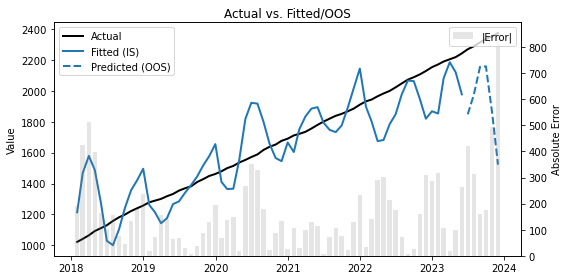


=== Model Testing ===
                              statistic    pvalue  passed
Category         Test                                    
NormalityTest    Jarque_Bera   3.937059  0.139662    True
                 Shapiro       0.963744  0.053870    True
StationarityTest ADF          -1.533927  0.516666   False


In [23]:
cm2.show_report(show_tests=True)

In [24]:
# cm2.tests_in.test_result

### Segment

In [25]:
seg_config = {
    'segment_id': 'VR',
    'target': 'VR_balance',
    'data_manager': dm,
    'model_cls': QT.OLS,
    'export_template_cls': QT.PPNR_OLS_ExportTemplate
}

seg1 = QT.Segment(**seg_config)

e:\OneDrive\Git\Project_LEGO\TECHNIC\data.py:265: UserWarning: No type mapping found for variables: VR_price, Fixed_price, PSR. Building raw variables only for those.
  warnings.warn(


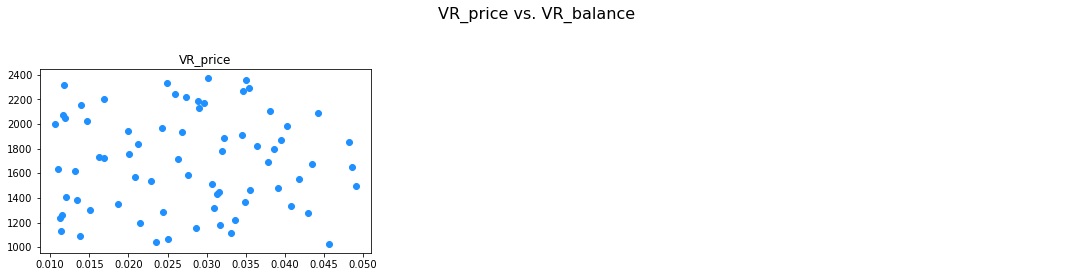

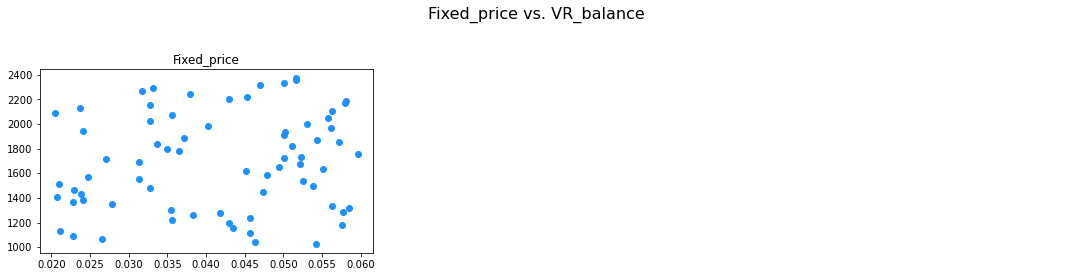

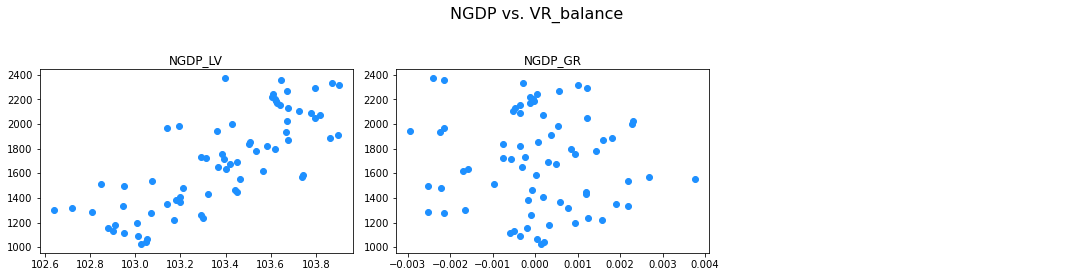

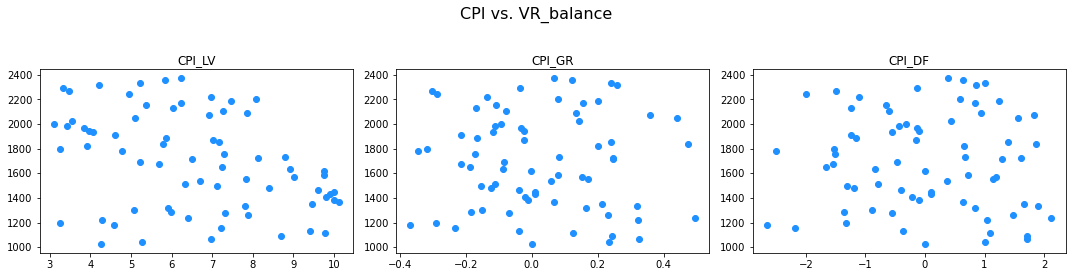

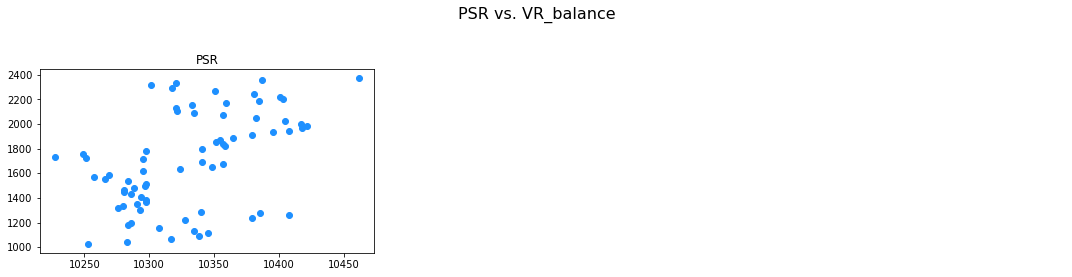

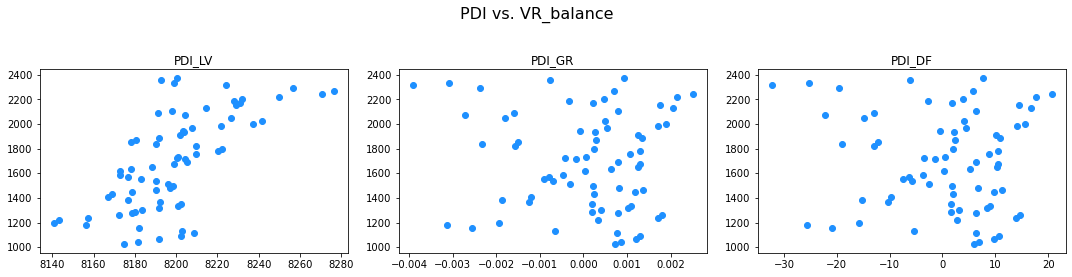

In [26]:
# Explore Vars
vars_list = ['VR_price', 'Fixed_price', 'NGDP', 'CPI', 'PSR', 'PDI']
seg1.explore_vars(vars_list, plot_type='scatter')

In [27]:
# CM1
indep_vars = ['NGDP']
seg1.build_cm('cm1', indep_vars)

VR_balance~C+NGDP_LV

In [28]:
# CM2
mth_var = [f'M{i}' for i in range(2,5)]
indep_vars = [mth_var, 'NGDP']
seg1.build_cm('cm2', indep_vars)

VR_balance~C+M2+M3+M4+NGDP_LV

In [29]:
from TECHNIC import GR2
# CM3
mth_var = [f'M{i}' for i in range(2,5)]
tsfm_var = [TSFM('PSR', GR2)]

indep_vars = [mth_var, 'NGDP', tsfm_var]
seg1.build_cm('cm3', indep_vars)

VR_balance~C+M2+M3+M4+NGDP_LV+PSR_GR2

=== In-Sample Performance ===
             r2    adj_r2          me         mae        rmse
Model                                                        
cm1    0.596697  0.590295  509.892567  183.046368  222.854010
cm2    0.705074  0.685413  515.865766  143.701378  190.572818
cm3    0.726481  0.703302  444.843939  140.765439  183.526356

=== Out-of-Sample Performance ===
               me         mae        rmse
Model                                    
cm1    694.567432  366.114671  403.420456
cm2    762.857989  383.648044  430.941118
cm3    932.067329  381.867671  478.857493

=== Performance Plot ===


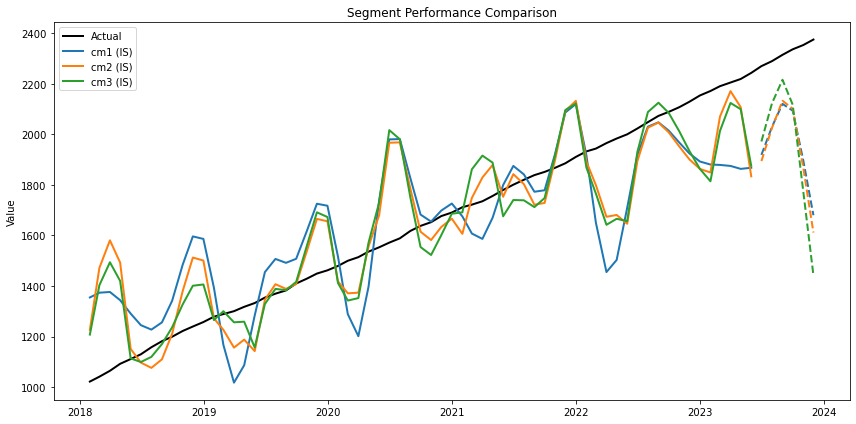


=== Model: cm1 — Parameters ===
  Variable          Coef        Pvalue            VIF          Std
0    const -88719.982410  9.654477e-14  111107.892197  9358.853151
1  NGDP_LV    874.300386  4.848960e-14       1.000000    90.558474

=== Model: cm2 — Parameters ===
  Variable           Coef        Pvalue            VIF          Std
0    const -105378.197744  2.924213e-17  131997.744181  8938.581111
1       M2     222.546657  1.448303e-02       1.081146    88.376988
2       M3     328.196940  5.858566e-04       1.130940    90.389262
3       M4     278.653181  2.629497e-03       1.090843    88.772446
4  NGDP_LV    1034.749124  1.521563e-17       1.186288    86.428974

=== Model: cm3 — Parameters ===
  Variable           Coef        Pvalue            VIF          Std
0    const -107859.905322  5.960000e-18  134334.123496  8757.206865
1       M2     217.099915  1.415434e-02       1.082089    85.864889
2       M3     322.580589  5.179768e-04       1.131943    87.820593
3       M4     276.8

In [30]:
seg1.show_report(show_params=True, show_tests=True)

In [31]:
vr_95 = seg1.dm.internal_data['VR_balance'].quantile(0.90)
vr_95

2218.766721015874

In [32]:
from TECHNIC import CondVar, BO
#cm4 with CondVars
mth_var = [f'M{i}' for i in range(2,5)]
tsfm_var = [TSFM('PSR', GR2)]
cond_var = CondVar('VR_price', 'VR_balance', BO, {'threshold': vr_95})

indep_vars = [mth_var, 'NGDP', tsfm_var, cond_var]
seg1.build_cm('cm4', indep_vars)

VR_balance~C+M2+M3+M4+NGDP_LV+PSR_GR2+VR_price_BO

In [33]:
(seg1.cms['cm4'].y > vr_95).loc[lambda x: x==1]

2023-05-31    True
2023-06-30    True
2023-07-31    True
2023-08-31    True
2023-09-30    True
2023-10-31    True
2023-11-30    True
Freq: M, Name: VR_balance, dtype: bool

In [34]:
tf = (seg1.cms['cm4'].X.VR_price_BO - seg1.dm.internal_data.VR_price) != 0
tf.loc[lambda x: x==1]

2023-06-30    True
2023-07-31    True
2023-08-31    True
2023-09-30    True
2023-10-31    True
2023-11-30    True
Freq: M, dtype: bool

In [39]:
cm = seg1.cms['cm3']
cm.tests_full.search_pass(fast_test=False)

(False, ['NormalityTest', 'StationarityTest'])

### featureBuilder

In [1]:
# test_featureBuilder.py
from TECHNIC.featureBuilder import FeatureBuilder
fb = FeatureBuilder(
    max_var_num=3,
    forced_in=['NGDP'],
    driver_pool=['NGDP','UNRATE','CPI'],
    desired_pool=['UNRATE'],
    max_lag=1
)

combos = fb.generate_combinations()
print("Generated TSFM combinations:\n")
for combo in combos:
    for ts in combo:
        print(ts)
    print()
print(f"Total combinations: {len(combos)}")


Generated TSFM combinations:

TSFM(variable='NGDP', transform_fn='LV', max_lag=0)
TSFM(variable='UNRATE', transform_fn='LV', max_lag=0)

TSFM(variable='NGDP', transform_fn='LV', max_lag=0)
TSFM(variable='UNRATE', transform_fn='LV', max_lag=1)

TSFM(variable='NGDP', transform_fn='LV', max_lag=0)
TSFM(variable='UNRATE', transform_fn='DF', max_lag=0)

TSFM(variable='NGDP', transform_fn='LV', max_lag=0)
TSFM(variable='UNRATE', transform_fn='DF', max_lag=1)

TSFM(variable='NGDP', transform_fn='LV', max_lag=0)
TSFM(variable='UNRATE', transform_fn='LV', max_lag=0)
TSFM(variable='CPI', transform_fn='LV', max_lag=0)

TSFM(variable='NGDP', transform_fn='LV', max_lag=0)
TSFM(variable='UNRATE', transform_fn='LV', max_lag=0)
TSFM(variable='CPI', transform_fn='LV', max_lag=1)

TSFM(variable='NGDP', transform_fn='LV', max_lag=0)
TSFM(variable='UNRATE', transform_fn='LV', max_lag=0)
TSFM(variable='CPI', transform_fn='DF', max_lag=0)

TSFM(variable='NGDP', transform_fn='LV', max_lag=0)
TSFM(variable='U

In [7]:
fb.mev_type_map

{'NGDP': 'level', 'M1': 'level', 'PDI': 'rate', 'CPI': 'rate'}

In [8]:
fb.type_tsfm_map

{'level': ['LV', 'GR'], 'rate': ['LV', 'GR', 'DF']}